In [3]:
from PIL import Image
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
def create_random_mask(height, width, center_fraction=0.1, undersample_fraction=0.8):
    """
    Create a 2D random mask with a fully sampled center region.

    Args:
        height: The height of the mask (frequency encoding dimension).
        width: The width of the mask (phase encoding dimension).
        center_fraction: Fraction of the image to be fully sampled at the center.
        undersample_fraction: Fraction of the remaining k-space to be sampled randomly.

    Returns:
        mask_2d: A binary mask with the same shape as the k-space data.
    """
    mask = np.zeros((height, width))
    
    # Fully sample the center region
    center_height = int(height * center_fraction)
    center_width = int(width * center_fraction)
    center_start_h = (height - center_height) // 2
    center_start_w = (width - center_width) // 2
    mask[center_start_h:center_start_h + center_height, center_start_w:center_start_w + center_width] = 1
    
    # Randomly sample the remaining k-space
    remaining_mask = np.random.choice([0, 1], size=(height, width), p=[1 - undersample_fraction, undersample_fraction])
    mask = np.maximum(mask, remaining_mask)  # Ensure the center is fully sampled
    
    return mask

In [4]:
mask = create_random_mask(640,320, center_fraction= 0.1, undersample_fraction= 0.8)

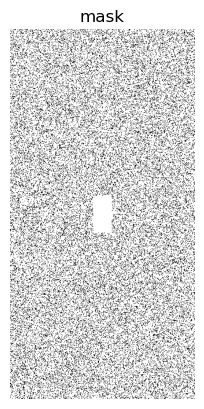

In [6]:
plt.imshow(mask, cmap='gray')  
plt.title('mask')
plt.axis('off')
plt.show()